### Discrete Datasets
##### 03Dec18
Now I want to look at a discrete dataset [Mocosko, _et. al._ 2015](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE63473) and see if my comparisons hold true.  
I will also try to feature select with NVR, which is designed for continuous data.

In [1]:
from fcc_DRs import *
from fcc_utils import *

Using TensorFlow backend.


In [73]:
# read in discrete dataset
%time P14retina_1 = RNA_counts.from_file(datafile='inputs/GSM1626793_P14Retina_1.digital_expression.txt.gz', cells_axis=1)

CPU times: user 22.8 s, sys: 2.67 s, total: 25.5 s
Wall time: 26.2 s


In [74]:
P14retina_1.data.shape

(6600, 20478)

In [75]:
%time P14retina_1_PCA = fcc_PCA(P14retina_1.arcsinh_norm(), n_components=100) # create PCA object with 100 components

CPU times: user 27.6 s, sys: 4.59 s, total: 32.2 s
Wall time: 24.5 s


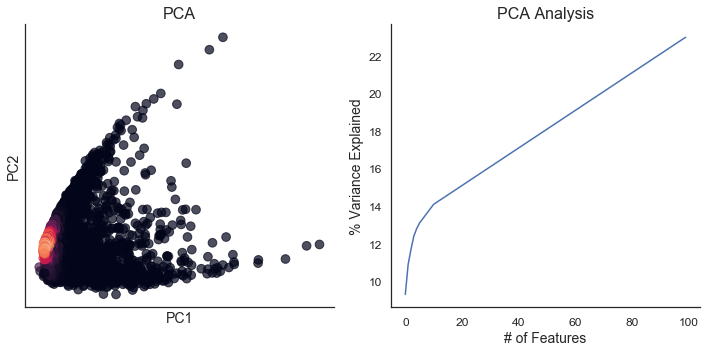

In [76]:
P14retina_1_PCA.plot()

In [77]:
%time P14retina_1_tSNE = fcc_tSNE(P14retina_1_PCA.results, perplexity=30) # perform tSNE on 100-component PCA results

CPU times: user 52 s, sys: 1.79 s, total: 53.8 s
Wall time: 54.3 s


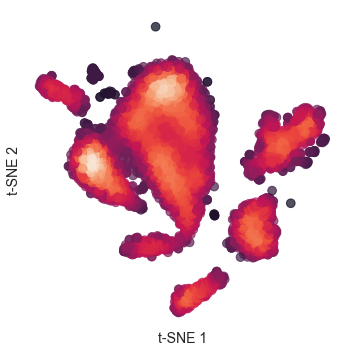

In [78]:
P14retina_1_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b9f5208>)

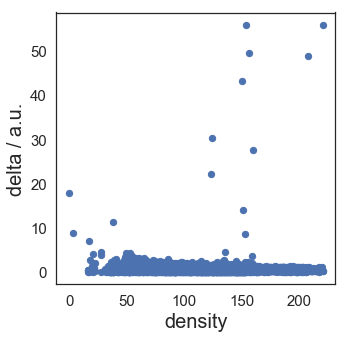

In [79]:
P14retina_1_tSNE.clu.draw_decision_graph() # look at potential cluster centers

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b326c50>)

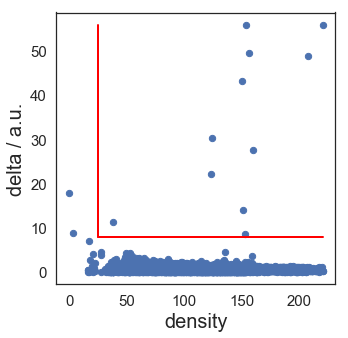

In [80]:
# assign cluster centers and visualize
P14retina_1_tSNE.clu.assign(25,8)
P14retina_1_tSNE.clu.draw_decision_graph(min_delta=P14retina_1_tSNE.clu.min_delta, min_density=P14retina_1_tSNE.clu.min_density)

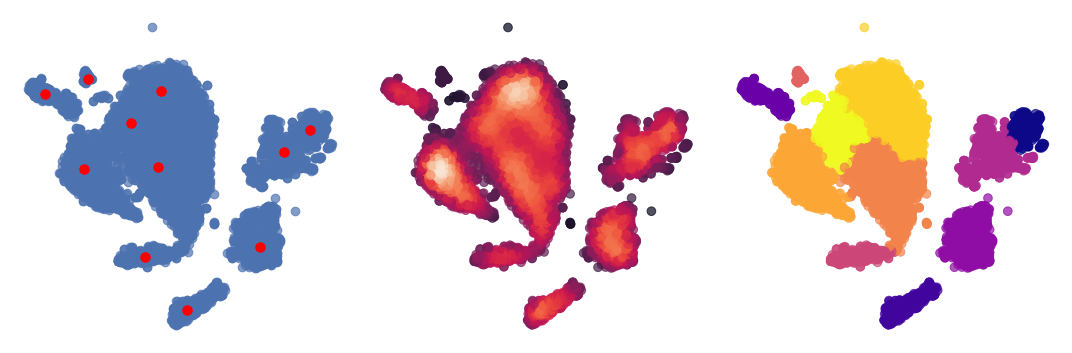

In [81]:
# show clustering and silhouette score
P14retina_1_tSNE.plot_clusters()

In [82]:
P14retina_1_tSNE.silhouette_score

0.43164766

In [91]:
# try to downsample based on cluster membership
# there are 6600 cells and 11 clusters. First, determine how many cells in each cluster:
IDs, counts = np.unique(P14retina_1_tSNE.clu.membership, return_counts=True)
i=0
for count in counts:
    p = np.round(count/counts.sum()*100, 3)
    print('{} percent of cells in cluster {}'.format(p, IDs[i]))
    print('{} cells from cluster {} out of 2000\n'.format(np.round(p*20,0), IDs[i]))
    i = i+1

4.515 percent of cells in cluster 0
90.0 cells from cluster 0 out of 2000

5.818 percent of cells in cluster 1
116.0 cells from cluster 1 out of 2000

4.652 percent of cells in cluster 2
93.0 cells from cluster 2 out of 2000

10.167 percent of cells in cluster 3
203.0 cells from cluster 3 out of 2000

9.167 percent of cells in cluster 4
183.0 cells from cluster 4 out of 2000

4.652 percent of cells in cluster 5
93.0 cells from cluster 5 out of 2000

0.636 percent of cells in cluster 6
13.0 cells from cluster 6 out of 2000

18.667 percent of cells in cluster 7
373.0 cells from cluster 7 out of 2000

14.197 percent of cells in cluster 8
284.0 cells from cluster 8 out of 2000

19.985 percent of cells in cluster 9
400.0 cells from cluster 9 out of 2000

7.545 percent of cells in cluster 10
151.0 cells from cluster 10 out of 2000



In [112]:
#np.where(P14retina_1_tSNE.clu.membership == 0)
np.random.seed(seed=None)
np.random.choice(np.where(P14retina_1_tSNE.clu.membership == 0)[0], 50, replace=False)

array([ 578,  365,  127,  849,  766,  565,  487,  798,  478,   38,  389,
         79,  533,  101,  234,  877,  218,  591,  388,  567,  423,  404,
        151,  556,  527, 1134,  155,   25,  153,  135,  130,   50,   81,
         99,  785,  221,  160,  853,  783,  863,   12,  467,  733,  468,
         18,  125,  214,  610,   20,  735])

In [129]:
np.random.seed(18) # set seed for reproducible sampling if desired
IDs, clu_counts = np.unique(P14retina_1_tSNE.clu.membership, return_counts=True) # get cluster IDs and number of cells in each

cells_out = np.array([]) # initialize list of output cell indices
for ID, count in zip(IDs, clu_counts):
    clu_num = int(count/clu_counts.sum()*3000) # number of cells to sample for given cluster
    cells_out = np.append(cells_out, np.random.choice(np.where(P14retina_1_tSNE.clu.membership == ID)[0], clu_num, replace=False))

len(cells_out)

2996

In [130]:
test = RNA_counts(data=P14retina_1.data.iloc[cells_out], labels=[P14retina_1.cell_labels, P14retina_1.gene_labels])

In [131]:
test.data.shape

(2996, 20478)

CPU times: user 11.9 s, sys: 1.17 s, total: 13 s
Wall time: 8.5 s


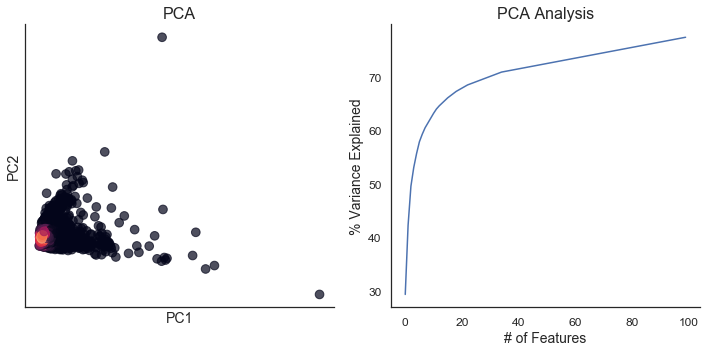

In [132]:
%time test_PCA = fcc_PCA(test.counts, n_components=100)
test_PCA.plot()

CPU times: user 22 s, sys: 975 ms, total: 23 s
Wall time: 23.5 s


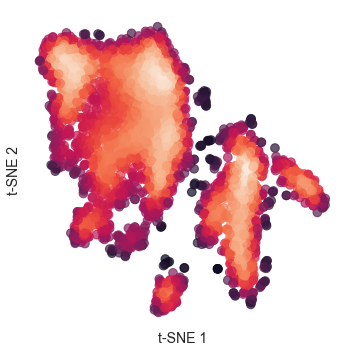

In [133]:
%time test_tSNE = fcc_tSNE(test_PCA.results, perplexity=30)
test_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c384f28>)

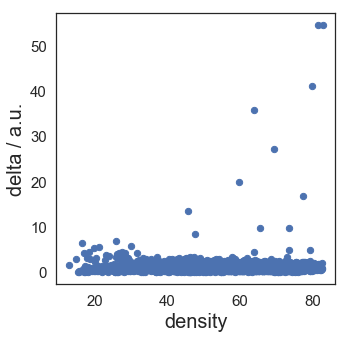

In [134]:
test_tSNE.clu.draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x108164d30>)

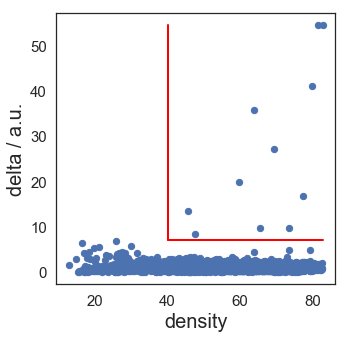

In [136]:
# assign cluster centers and visualize
test_tSNE.clu.assign(40,7)
test_tSNE.clu.draw_decision_graph(min_delta=test_tSNE.clu.min_delta, min_density=test_tSNE.clu.min_density)

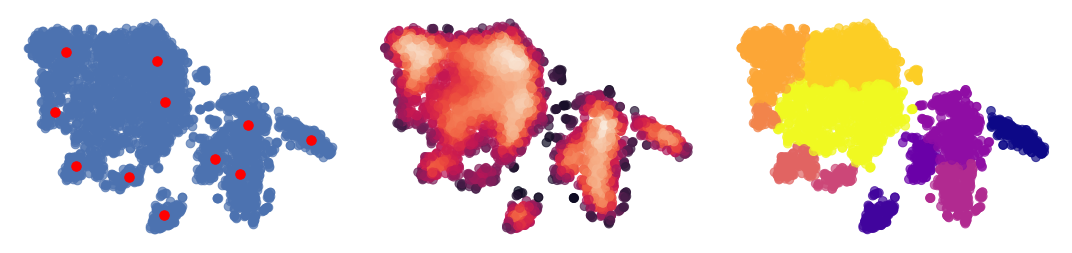

In [137]:
test_tSNE.plot_clusters()

Porportional downsampling maintains 11 clusters from original dataset!

---

In [12]:
# read in discrete dataset
%time P14retina_3 = RNA_counts.from_file(datafile='inputs/GSM1626795_P14Retina_3.digital_expression.txt.gz', cells_axis=1)

CPU times: user 20.1 s, sys: 2.09 s, total: 22.2 s
Wall time: 22.5 s


In [13]:
P14retina_3.data.shape

(6120, 20169)

In [14]:
%time P14retina_3_PCA = fcc_PCA(P14retina_3.arcsinh_norm(), n_components=100) # create PCA object with 100 components

CPU times: user 24.4 s, sys: 3.8 s, total: 28.2 s
Wall time: 21.1 s


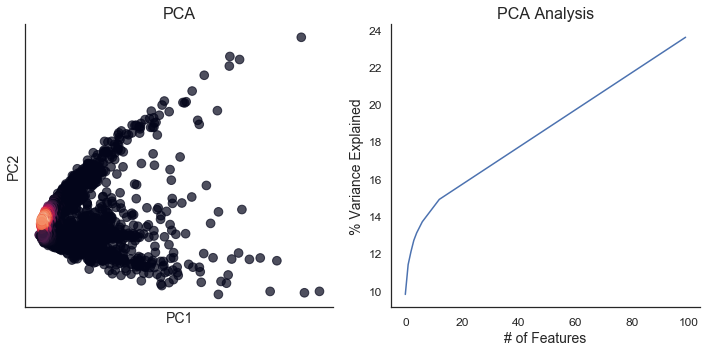

In [15]:
P14retina_3_PCA.plot()

In [16]:
%time P14retina_3_tSNE = fcc_tSNE(P14retina_3_PCA.results, perplexity=30) # perform tSNE on 100-component PCA results

CPU times: user 50.5 s, sys: 1.86 s, total: 52.4 s
Wall time: 52.7 s


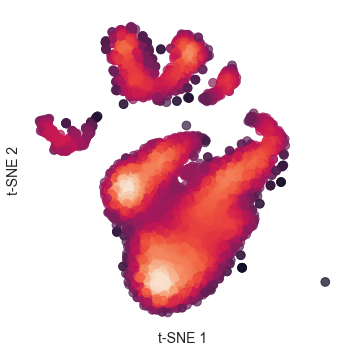

In [17]:
P14retina_3_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x125cd7588>)

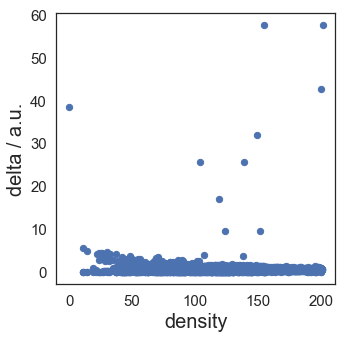

In [18]:
P14retina_3_tSNE.clu.draw_decision_graph() # look at potential cluster centers

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1257d5240>)

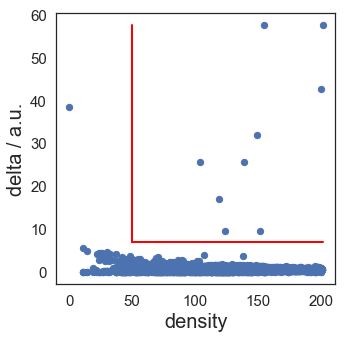

In [19]:
# assign cluster centers and visualize
P14retina_3_tSNE.clu.assign(50,7)
P14retina_3_tSNE.clu.draw_decision_graph(min_delta=P14retina_3_tSNE.clu.min_delta, min_density=P14retina_3_tSNE.clu.min_density)

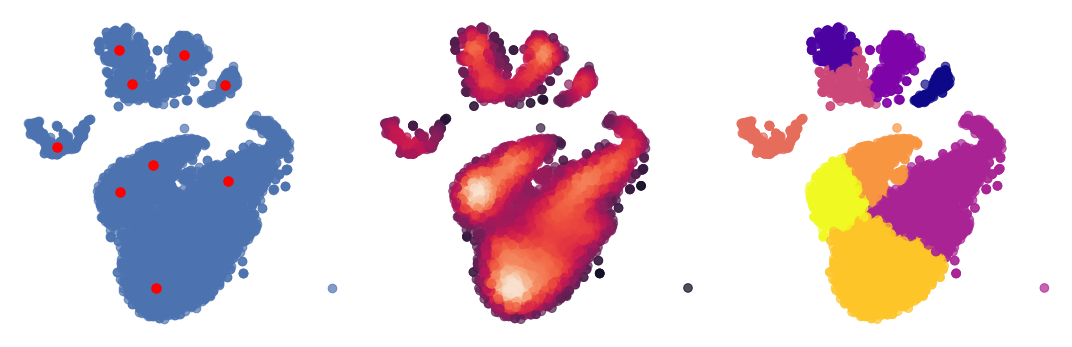

In [20]:
# show clustering and silhouette score
P14retina_3_tSNE.plot_clusters()

In [21]:
P14retina_3_tSNE.silhouette_score

0.41797605

---

In [22]:
# read in discrete dataset
%time P14retina_5 = RNA_counts.from_file(datafile='inputs/GSM1626797_P14Retina_5.digital_expression.txt.gz', cells_axis=1)

CPU times: user 25.2 s, sys: 3.07 s, total: 28.2 s
Wall time: 28.7 s


In [23]:
P14retina_5.data.shape

(7650, 19719)

In [60]:
test = RNA_counts.downsample(P14retina_7.data, n_cells=1000)

In [61]:
%time P14retina_5_PCA = fcc_PCA(test.arcsinh_norm(), n_components=100) # create PCA object with 100 components

CPU times: user 3.38 s, sys: 585 ms, total: 3.97 s
Wall time: 2.8 s


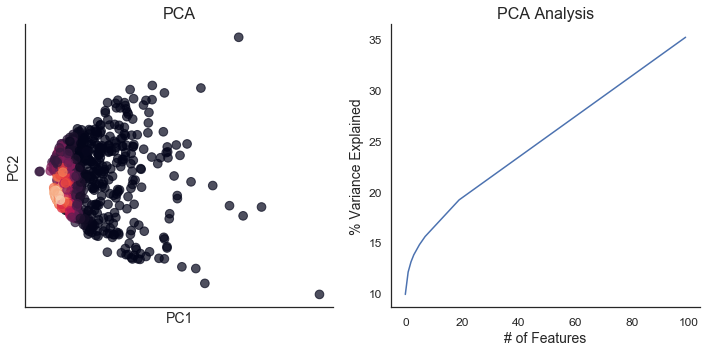

In [62]:
P14retina_5_PCA.plot()

In [63]:
%time P14retina_5_tSNE = fcc_tSNE(P14retina_5_PCA.results, perplexity=30) # perform tSNE on 100-component PCA results

CPU times: user 6.05 s, sys: 278 ms, total: 6.33 s
Wall time: 6.42 s


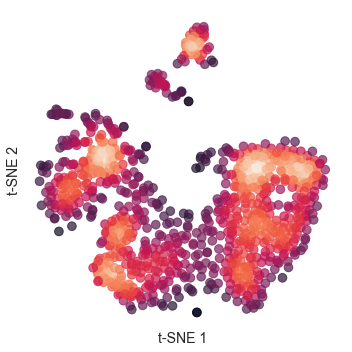

In [64]:
P14retina_5_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c32c748>)

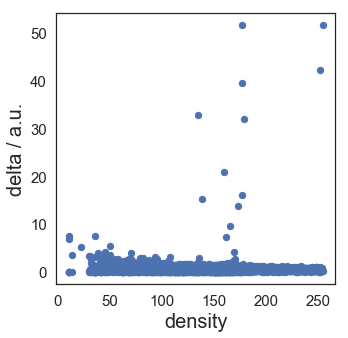

In [28]:
P14retina_5_tSNE.clu.draw_decision_graph() # look at potential cluster centers

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x125ab4240>)

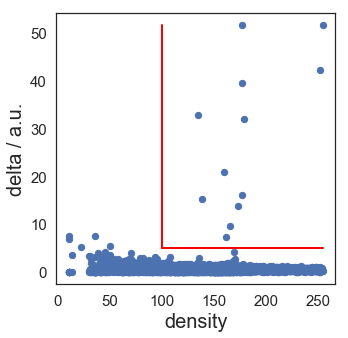

In [29]:
# assign cluster centers and visualize
P14retina_5_tSNE.clu.assign(100,5)
P14retina_5_tSNE.clu.draw_decision_graph(min_delta=P14retina_5_tSNE.clu.min_delta, min_density=P14retina_5_tSNE.clu.min_density)

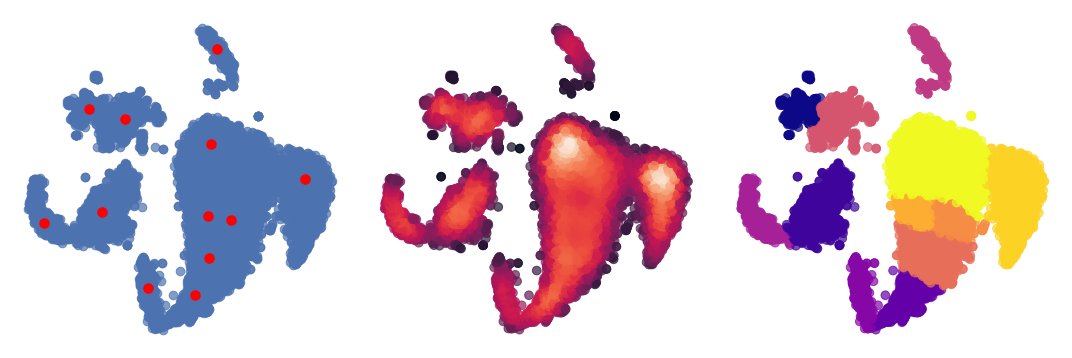

In [30]:
# show clustering and silhouette score
P14retina_5_tSNE.plot_clusters()

In [31]:
P14retina_5_tSNE.silhouette_score

0.3991474

---

In [2]:
# read in discrete dataset
%time P14retina_7 = RNA_counts.from_file(datafile='inputs/GSM1626799_P14Retina_7.digital_expression.txt.gz', cells_axis=1)

CPU times: user 11 s, sys: 1.04 s, total: 12 s
Wall time: 12.2 s


In [3]:
P14retina_7.data.shape

(4000, 20105)

In [4]:
# downsample to usable numnber of cells
P14retina_7_0 = RNA_counts.downsample(P14retina_7.data, n_cells=300)

In [65]:
%time P14retina_7_PCA = fcc_PCA(P14retina_7.arcsinh_norm(), n_components=100) # create PCA object with 100 components

CPU times: user 15.9 s, sys: 2.62 s, total: 18.6 s
Wall time: 14 s


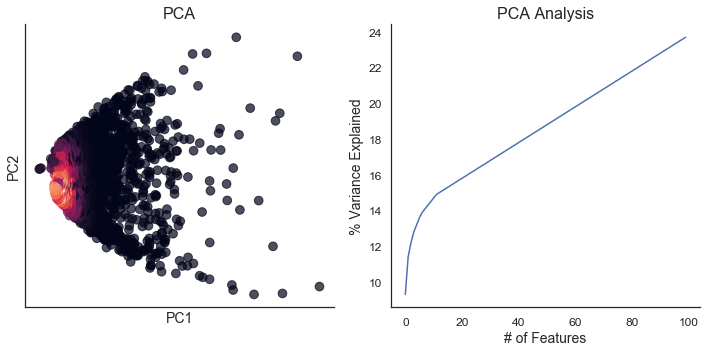

In [66]:
P14retina_7_PCA.plot()

In [67]:
%time P14retina_7_tSNE = fcc_tSNE(P14retina_7_PCA.results, perplexity=30) # perform tSNE on 100-component PCA results

CPU times: user 30.1 s, sys: 1.04 s, total: 31.2 s
Wall time: 31.5 s


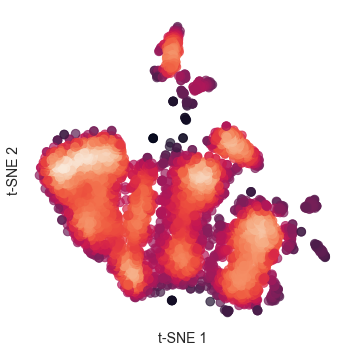

In [68]:
P14retina_7_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12894a3c8>)

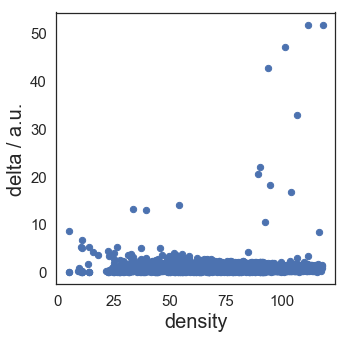

In [69]:
P14retina_7_tSNE.clu.draw_decision_graph() # look at potential cluster centers

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10813c8d0>)

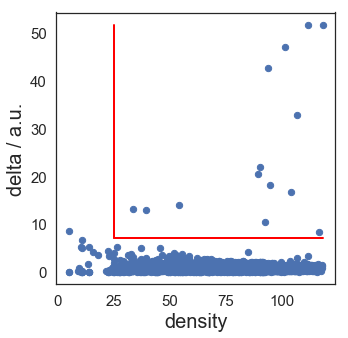

In [70]:
# assign cluster centers and visualize
P14retina_7_tSNE.clu.assign(25,7)
P14retina_7_tSNE.clu.draw_decision_graph(min_delta=P14retina_7_tSNE.clu.min_delta, min_density=P14retina_7_tSNE.clu.min_density)

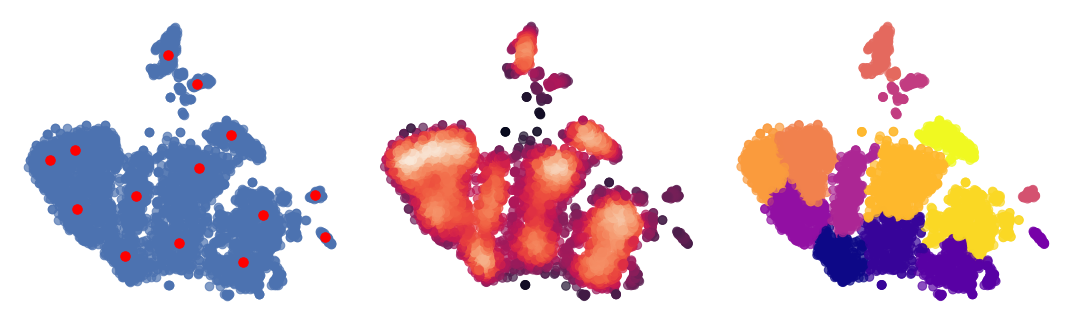

In [71]:
# show clustering and silhouette score
P14retina_7_tSNE.plot_clusters()

In [72]:
P14retina_7_tSNE.silhouette_score

0.4049245

---

In [15]:
# read in Seurat-feature-selected dataset
%time P14retina_7_seurat = RNA_counts.from_file(datafile='inputs/GSM1626793_P14Retina_1.digital_expression.txt.gz', cells_axis=1)

CPU times: user 22.6 s, sys: 2.53 s, total: 25.1 s
Wall time: 25.5 s


In [16]:
P14retina_7_seurat_0 = RNA_counts.downsample(data=P14retina_7_seurat.data, n_cells=300)

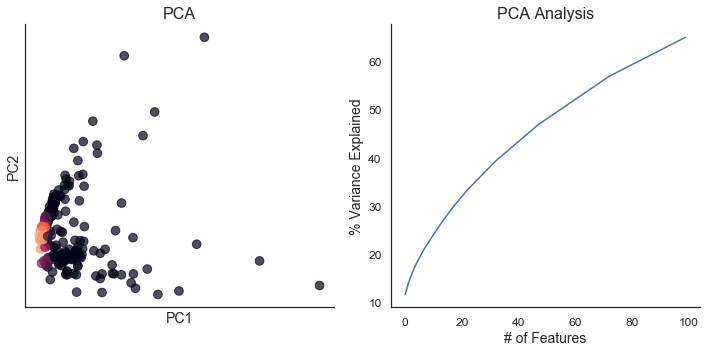

CPU times: user 2.08 s, sys: 313 ms, total: 2.4 s
Wall time: 1.26 s


In [52]:
%%time
P14retina_7_seurat_PCA = fcc_PCA(P14retina_7_seurat_0.arcsinh_norm(), n_components=100)
P14retina_7_seurat_PCA.plot()

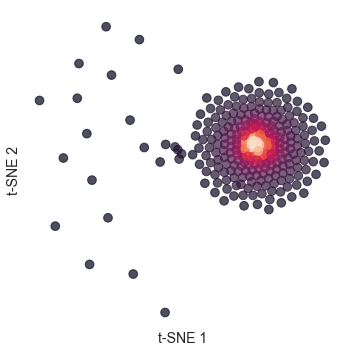

CPU times: user 4.81 s, sys: 36.5 ms, total: 4.85 s
Wall time: 4.74 s


In [46]:
%%time
# perform tSNE on feature selected data
P14retina_7_seurat_tSNE = fcc_tSNE(P14retina_7_seurat_0.arcsinh_norm(), n_components=2, perplexity=30)
P14retina_7_seurat_tSNE.plot()

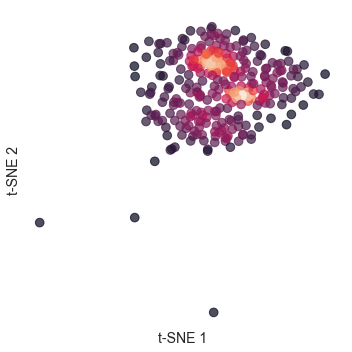

CPU times: user 1.87 s, sys: 34.7 ms, total: 1.9 s
Wall time: 1.79 s


In [53]:
%%time
# perform tSNE on feature selected data
P14retina_7_seurat_PCAtSNE = fcc_tSNE(P14retina_7_seurat_PCA.results, n_components=2, perplexity=30)
P14retina_7_seurat_PCAtSNE.plot()

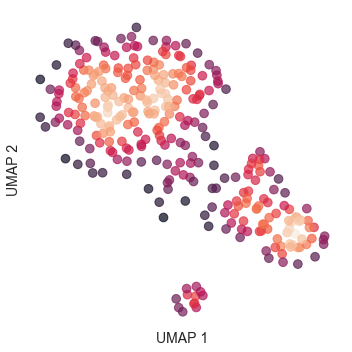

CPU times: user 2.1 s, sys: 125 ms, total: 2.22 s
Wall time: 2.07 s


In [37]:
%%time
# perform UMAP on feature selected data
P14retina_7_seurat_UMAP = fcc_UMAP(P14retina_7_seurat_0.arcsinh_norm(), perplexity=30)
P14retina_7_seurat_UMAP.plot()

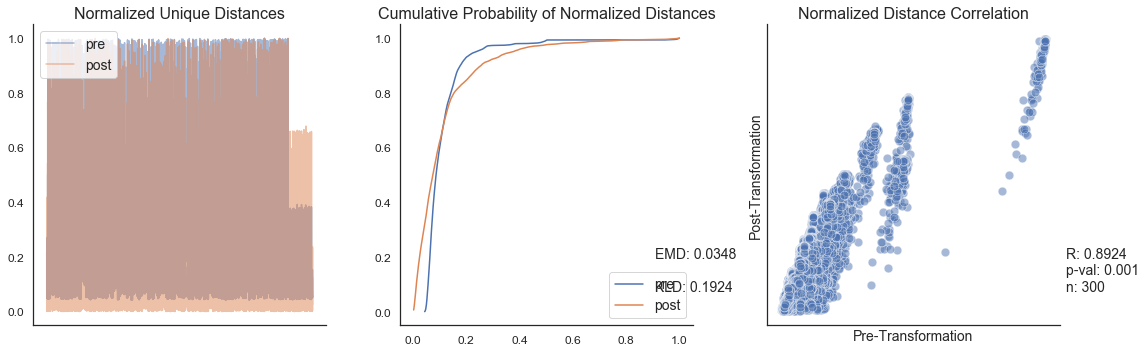

CPU times: user 10.7 s, sys: 2.48 s, total: 13.2 s
Wall time: 12.6 s


In [38]:
%time mantel_stats, EMD, KLD = compare_euclid(pre=P14retina_7_seurat_0.distance_matrix(), post=P14retina_7_seurat_PCA.distance_matrix())

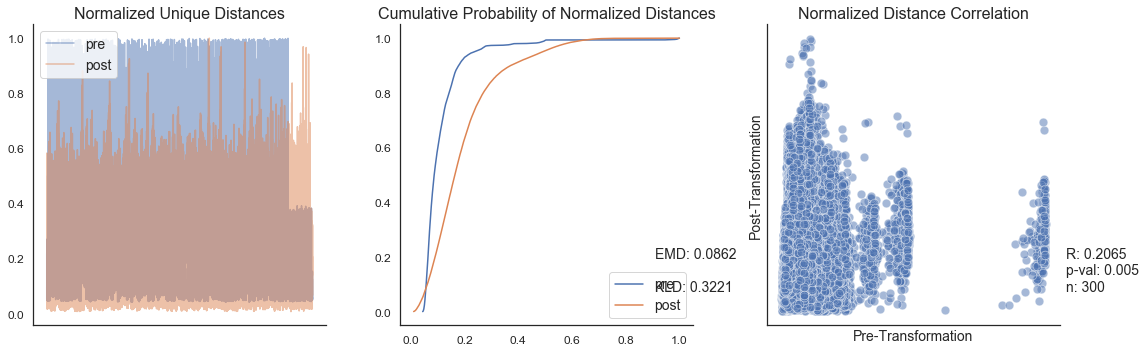

CPU times: user 11.5 s, sys: 2.9 s, total: 14.4 s
Wall time: 13.8 s


In [39]:
%time mantel_stats, EMD, KLD = compare_euclid(pre=P14retina_7_seurat_0.distance_matrix(), post=P14retina_7_seurat_tSNE.distance_matrix())

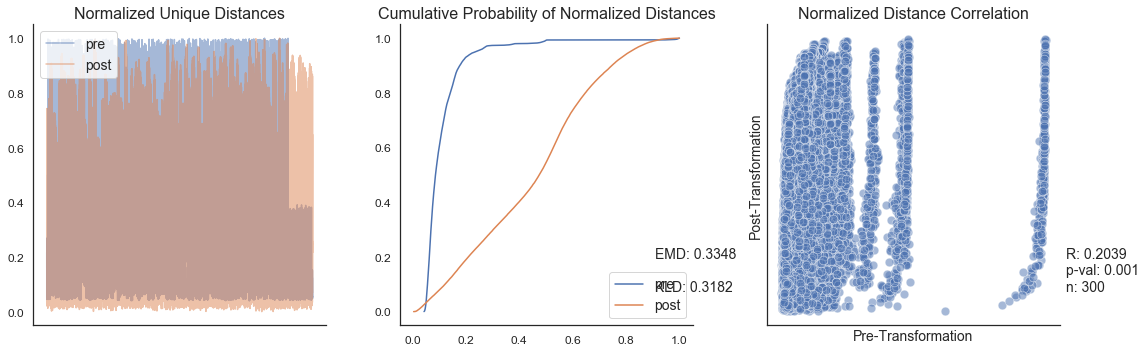

CPU times: user 11 s, sys: 2.63 s, total: 13.6 s
Wall time: 12.9 s


In [51]:
%time mantel_stats, EMD, KLD = compare_euclid(pre=P14retina_7_seurat_0.distance_matrix(), post=P14retina_7_seurat_PCAtSNE.distance_matrix())

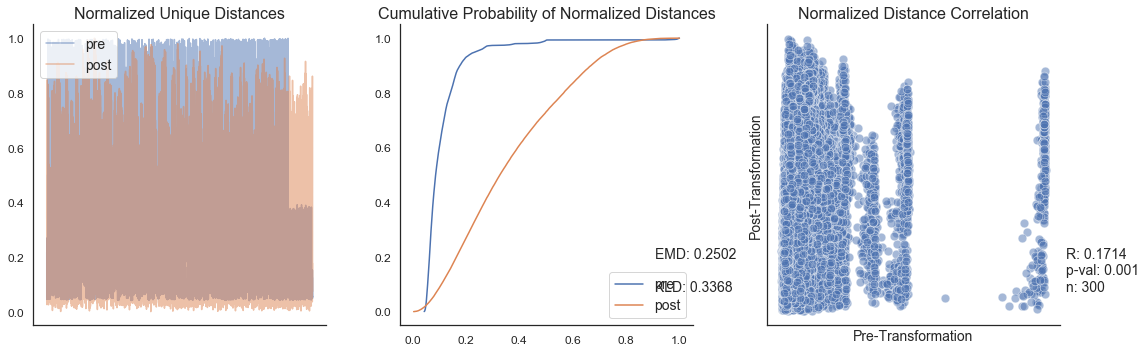

CPU times: user 11.7 s, sys: 2.84 s, total: 14.5 s
Wall time: 14 s


In [40]:
%time mantel_stats, EMD, KLD = compare_euclid(pre=P14retina_7_seurat_0.distance_matrix(), post=P14retina_7_seurat_UMAP.distance_matrix())

---
Let's try to mash the replicates together and analyze

In [10]:
P14retina_1_3 = P14retina_1.data.append(P14retina_3.data)
P14retina_5_7 = P14retina_5.data.append(P14retina_7.data)

In [11]:
P14retina = P14retina_1_3.append(P14retina_5_7)
P14retina.shape

(24370, 23432)

In [12]:
# check cell number
P14retina_1.data.shape[0] + P14retina_3.data.shape[0] + P14retina_5.data.shape[0] + P14retina_7.data.shape[0]

24370

In [13]:
# generate new counts object with combined data
# fill in NaN values with zeros for genes that were absent in individual datasets
P14retina_combined = RNA_counts(data=P14retina.fillna(value=0))

---
Save files to run through Paige's cluster membership correlation algorithm

In [ ]:
np.savetxt(X=P14retina_combined_tSNE.clu.membership, fname='/Users/cody/Google Drive/paige_alg/tSNE_membership.csv', delimiter=',')

In [ ]:
pd.DataFrame(P14retina_combined.gene_IDs).to_csv('/Users/cody/Google Drive/paige_alg/genes.csv', index=False, header=False)

In [ ]:
np.savetxt(X=P14retina_combined.counts, fname='/Users/cody/Google Drive/paige_alg/counts.csv', delimiter=',')

---
Save files to run through Paige's cluster membership correlation algorithm

In [ ]:
np.savetxt(X=P14retina_combined_UMAP.clu.membership, fname='/Users/cody/Google Drive/paige_alg/UMAP_membership.csv', delimiter=',')

---
#### NVR

In [24]:
retina_nvr = RNA_counts.nvr_select(P14retina_7_0)

Start min_conn_k
2 connections needed
Finished min_conn_k 
Start traj_dist
Finished traj_dist
Start adaptive_knn_graph
Finished adaptive_knn_graph
Start global variance calculation
Finished global variance calculation
Start neighborhood variance calculation
Completion:
Finished neighborhood variance calculation
Start global to neighborhood variance ratio calculation
Finished global to neighborhood variance ratio calculation
Finished selection_val
Finished gene selection in 109.02700161933899 seconds
done

Selected 379 variable genes



In [25]:
%time retina_nvr_PCA = fcc_PCA(retina_nvr.counts, n_components=2)

CPU times: user 39.7 ms, sys: 8.99 ms, total: 48.7 ms
Wall time: 41.3 ms


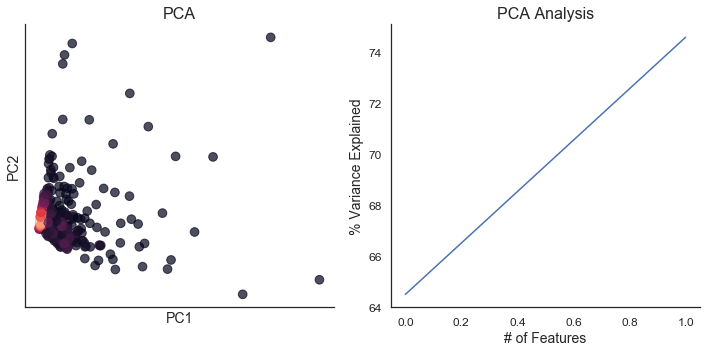

In [26]:
retina_nvr_PCA.plot()

In [27]:
%time retina_nvr_tSNE = fcc_tSNE(retina_nvr.counts, perplexity=30)

CPU times: user 1.41 s, sys: 15.7 ms, total: 1.43 s
Wall time: 1.43 s


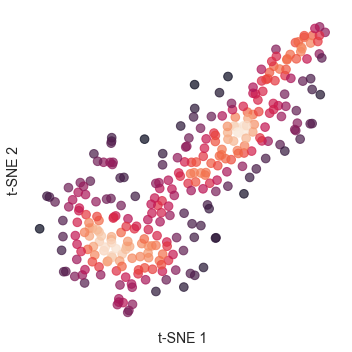

In [28]:
retina_nvr_tSNE.plot()

In [29]:
%time retina_nvr_UMAP = fcc_UMAP(retina_nvr.counts, perplexity=30)

CPU times: user 638 ms, sys: 34.5 ms, total: 673 ms
Wall time: 663 ms


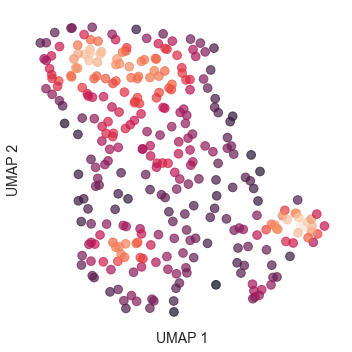

In [30]:
retina_nvr_UMAP.plot()

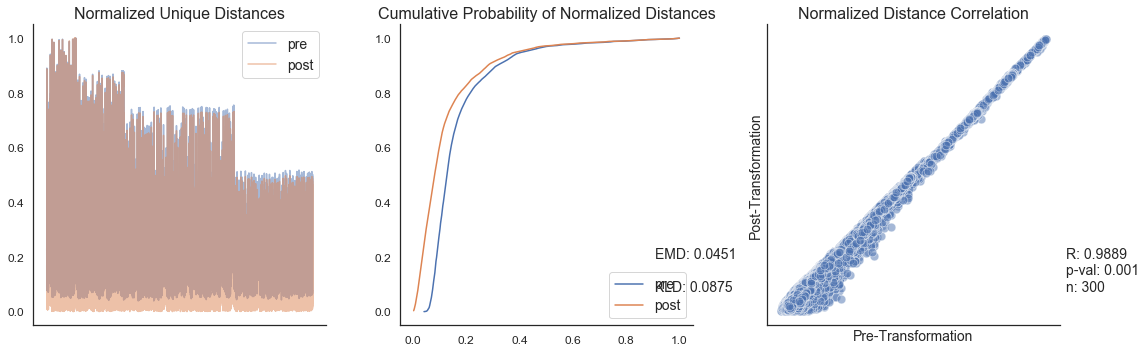

CPU times: user 2.54 s, sys: 148 ms, total: 2.69 s
Wall time: 2.04 s


((0.9888504082198348, 0.001, 300), 0.04512739042999763, 0.08747289357562008)

In [31]:
%time compare_euclid(retina_nvr.distance_matrix(), retina_nvr_PCA.distance_matrix())

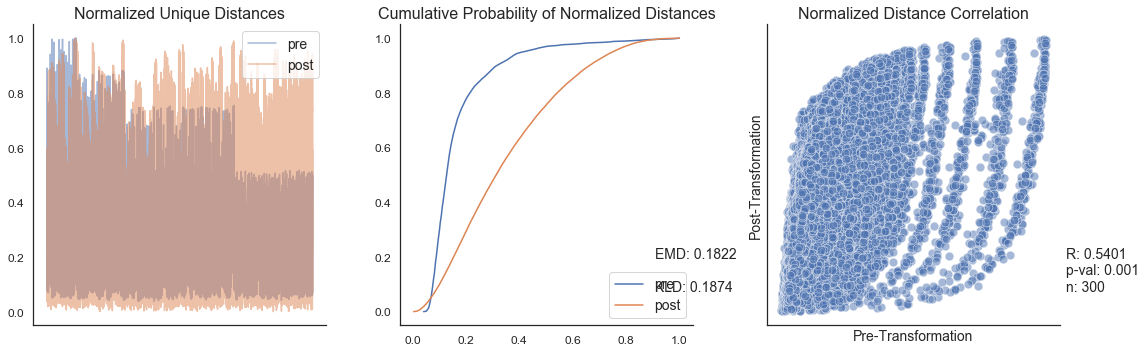

CPU times: user 2.92 s, sys: 146 ms, total: 3.07 s
Wall time: 2.4 s


((0.5401385946941537, 0.001, 300), 0.18219533397194057, 0.18737359872984893)

In [32]:
%time compare_euclid(retina_nvr.distance_matrix(), retina_nvr_tSNE.distance_matrix())

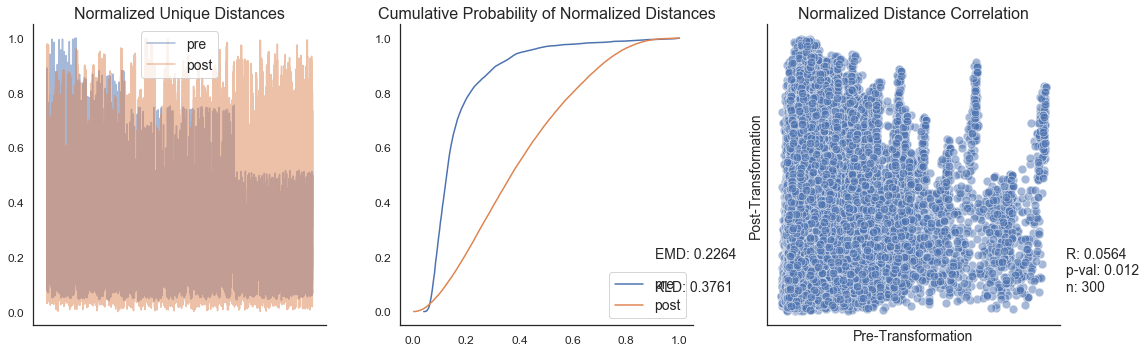

CPU times: user 2.93 s, sys: 145 ms, total: 3.07 s
Wall time: 2.4 s


((0.05643167566274236, 0.012, 300), 0.22640573698715338, 0.3761312508848126)

In [33]:
%time compare_euclid(retina_nvr.distance_matrix(), retina_nvr_UMAP.distance_matrix())

---
downsample by cluster.  
calculate variance of each gene and grab top n variant genes.